In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-forecast-data/DailyDelhiClimateTrain.csv
/kaggle/input/weather-forecast-data/DailyDelhiClimateTest.csv


In [2]:
weather_data= pd.read_csv('/kaggle/input/weather-forecast-data/DailyDelhiClimateTrain.csv')

In [3]:
weather_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
weather_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
fig = px.line(weather_data, x="date",y= "meantemp",  
              title="Mean temperature in Delhi over the years")
fig.show()

In [7]:
fig = px.line(weather_data, x="date",y= "humidity",  
              title="Humidity in Delhi over the years")
fig.show()

In [8]:
fig = px.line(weather_data, x="date",y= "wind_speed",  
              title="Wind Speed in Delhi over the years")
fig.show()

Relationship between temperature and humidity

In [9]:
fig= px.scatter(weather_data, y= "meantemp", x="humidity",trendline = "ols",
                title="Relationship Between Temperature and Humidity", size="meantemp")
fig.show()

There’s a negative correlation between temperature and humidity in Delhi. It means higher temperature results in low humidity and lower temperature results in high humidity

# Analyzing Temperature Change
Now let’s analyze the temperature change in Delhi over the years. For this task, firstly we will convert the data type of the date column into datetime. Then add two new columns in the dataset for year and month values.

In [10]:
weather_data['date'] = pd.to_datetime(weather_data.date, format = "%Y-%m-%d")
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month

In [11]:
weather_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [12]:
weather_data['month'].nunique()

12

Visualizing the temperature change in Delhi over the years

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

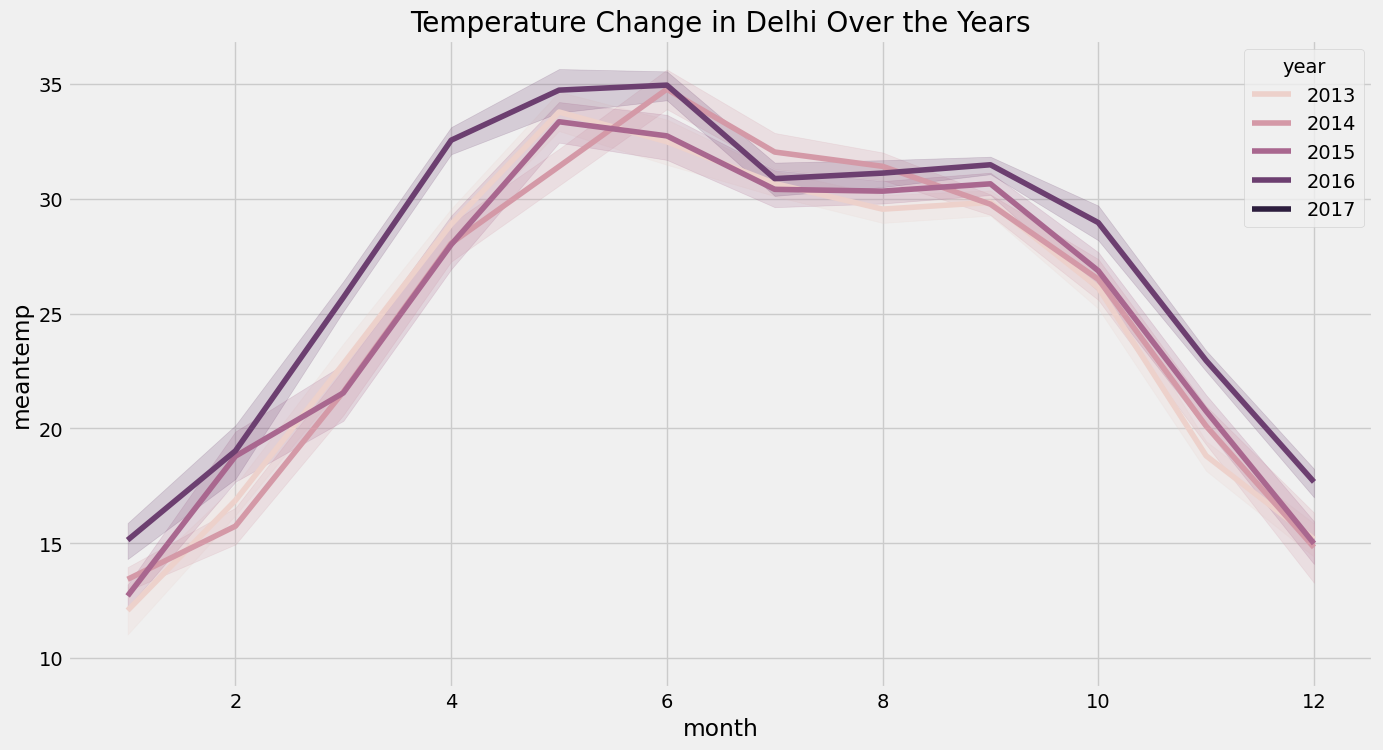

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,8))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data =weather_data, x="month", y="meantemp", hue= 'year');
plt.show()

For weather forecasting, we will be using the Facebook prophet model. The Facebook prophet model is one of the best techniques for time series forecasting. 


The prophet model accepts time data named as “ds”, and labels as “y”. 

In [14]:
!pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [17]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Renaming mean temperature as y and date as ds because that is what the prophet model recognize 

In [15]:
forecast_data = weather_data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})

Initialize the prophet model

In [18]:
model =  Prophet()

Fit the model on the forecast dataset

In [19]:
model.fit(forecast_data)

23:45:21 - cmdstanpy - INFO - Chain [1] start processing
23:45:21 - cmdstanpy - INFO - Chain [1] done processing


Generate future data for the next 365 days

In [21]:
forecasts = model.make_future_dataframe(periods= 365)

Make predictions with the model

In [22]:
predictions = model.predict(forecasts)

Visualize the predicted temperature

In [23]:
plot_plotly(model, predictions)